# 분류 (Classification)
- 입력 데이터를 미리 정의되니 여러 클래스 중 하나로 예측하는 것
(범주형 데이터)

    - 이진 분류: 양성(1), 음성(0) 중에 하나를 맞추는 것
    - 다중 분류: 여러 클래스 중 하나를 맞추는 것것

In [ ]:
### Logistic Regression
- 선형 회귀 방식으로 분류 문제를 해결하는 모델
    - 이진 분류: 이진 분류를 위한 로지스틱 함수(시그모이드)를 통해 확률값을 계산하고 0 또는 1로 분류
    - 다중 분류: 다중 분류를 위한 소프트맥스 함수를 통해 확률값을 계산하고 여러 클래스 중 하나로 분류
    - 다중 레이블 분류: 하나의 데이터에 여러 개의 레이블을 분류
    - 다중 출력 분류: 하나의 데이터에 여러 개의 출력을 만드는 것

### 로지스틱 회귀 모델 적용
- 이진 분류
    - 예제 데이터: 유방암 예측
- 다중 분류
    - 예제 데이터: 와인 예측
- 다중 레이블 분류
    - 예제 데이터:  
- 다중 출력 분류
    - 예제 데이터: 
    

**하이퍼 파라미터**

<table>
  <thead>
    <tr>
      <th>하이퍼파라미터</th>
      <th>설명</th>
      <th>기본값</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>penalty</code></td>
      <td>정규화의 종류 지정 / <code>'l1'</code>, <code>'l2'</code>, <code>'elasticnet'</code>, <code>'none'</code> 중 선택</td>
      <td><code>'l2'</code></td>
    </tr>
    <tr>
      <td><code>C</code></td>
      <td>정규화의 강도를 제어 / 값이 작을수록 강한 정규화 적용 (<code>1 / λ</code>로 해석 가능)</td>
      <td><code>1.0</code></td>
    </tr>
    <tr>
      <td><code>solver</code></td>
      <td>최적화 알고리즘 선택 / <code>'newton-cg'</code>, <code>'lbfgs'</code>, <code>'liblinear'</code>, <code>'sag'</code>, <code>'saga'</code> 중 선택</td>
      <td><code>'lbfgs'</code></td>
    </tr>
    <tr>
      <td><code>max_iter</code></td>
      <td>최적화를 위한 최대 반복 횟수</td>
      <td><code>100</code></td>
    </tr>
    <tr>
      <td><code>multi_class</code></td>
      <td>다중 클래스 문제에서 사용할 전략 / <code>'auto'</code>, <code>'ovr'</code> (one-vs-rest), <code>'multinomial'</code> 중 선택</td>
      <td><code>'auto'</code></td>
    </tr>
    <tr>
      <td><code>fit_intercept</code></td>
      <td>절편을 학습할지 여부 / <code>True</code> 또는 <code>False</code></td>
      <td><code>True</code></td>
    </tr>
  </tbody>
</table>

**solver**

<table>
  <thead>
    <tr>
      <th>Solver</th>
      <th>설명</th>
      <th>특징</th>
      <th>추천 사용 상황</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>liblinear</strong></td>
      <td>선형 분류를 위한 라이브러리인 "LIBLINEAR"에서 유래, 작은 데이터셋이나 희소 데이터셋에 적합한 이중 좌표축 감소법(Dual Coordinate Descent Algorithm) 사용</td>
      <td>빠르고 메모리 효율적이며, L1 및 L2 정규화 모두를 지원</td>
      <td>작은 크기의 데이터셋, 희소한 피처를 가진 데이터셋</td>
    </tr>
    <tr>
      <td><strong>newton-cg</strong></td>
      <td>Newton Conjugate Gradient 뉴턴법을 사용한 최적화 알고리즘, 큰 데이터셋에서도 효율적으로 동작</td>
      <td>L2 정규화를 지원하며, 대규모 데이터셋에 적합</td>
      <td>중대형 크기의 데이터셋</td>
    </tr>
    <tr>
      <td><strong>lbfgs</strong></td>
      <td>Broyden-Fletcher-Goldfarb-Shanno(BFGS) 알고리즘의 변형인 L-BFGS(Limited-memory Broyden–Fletcher–Goldfarb–Shanno) 알고리즘을 사용</td>
      <td>L2 정규화를 지원하며, 메모리를 절약하면서도 효율적인 성능을 발휘</td>
      <td>대규모 데이터셋, 다중 클래스 분류</td>
    </tr>
    <tr>
      <td><strong>sag</strong></td>
      <td>Stochastic Average Gradient 하강법으로, 점진적으로 평균 그래디언트를 사용하여 최적화</td>
      <td>매우 큰 데이터셋에서 효율적이며, L2 정규화를 지원</td>
      <td>매우 큰 크기의 데이터셋</td>
    </tr>
    <tr>
      <td><strong>saga</strong></td>
      <td>Stochastic Average Gradient Augmented / sag의 확장판으로, L1 및 L2 정규화 모두를 지원</td>
      <td>희소 데이터셋에도 적합하며, 매우 큰 데이터셋에서 효율적</td>
      <td>매우 큰 크기의 데이터셋, 희소한 피처를 가진 데이터셋</td>
    </tr>
  </tbody>
</table>

#### 이진 분류를 위한 Sigmoid 함수
- 선형회귀식을 통해 도출한 예측값(z)을 0과 1 사이의 수로 변환해주는 활성화 함수(Activation Function)

$
    시그모이드(z) = \frac{1}{1 + e^{-z}}
$

In [ ]:
z : 회귀식을 통해서 도출된 예측값
e : 자연상수

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

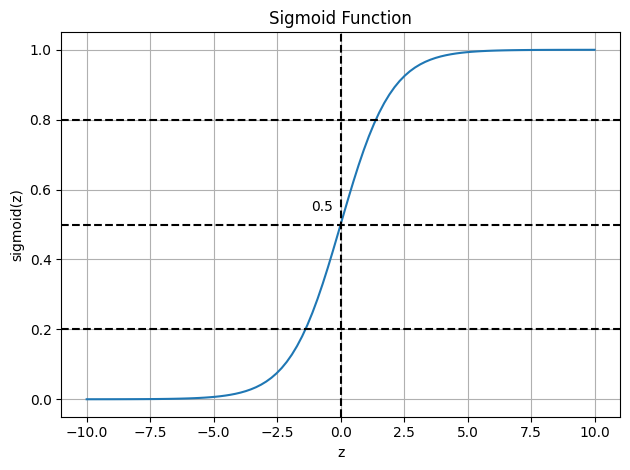

In [ ]:
z = np.linspace(-10, 10, 100) # z: 선형회귀 결과값, -10부터 10까지 100개의 수

sigmoid = 1 / (1 + np.exp(-z)) # 시그모이드 함수

plt.plot(z, sigmoid)

plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid()
plt.title('Sigmoid Function')

plt.axvline(0, color='k', linestyle='--')
plt.axhline(0.5, color='k', linestyle='--')
plt.axhline(0.8, color='k', linestyle='--')
plt.axhline(0.2, color='k', linestyle='--')
plt.text(-0.75, 0.55, '0.5', ha='center', va='center')

plt.tight_layout()
plt.show()



In [21]:
fish_df = pd.read_csv('./data/fish.csv')
fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [23]:
fish_df.Species.value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [22]:
fish_df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [27]:
is_bream_or_smelt = (fish_df['Species'] == 'Bream') | (fish_df['Species'] == 'Smelt')
is_bream_or_smelt.value_counts()

Species
False    110
True      49
Name: count, dtype: int64

In [28]:
fish_df = fish_df[is_bream_or_smelt]
fish_df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
5,Bream,450.0,29.7,34.7,13.6024,4.9274
6,Bream,500.0,29.7,34.5,14.1795,5.2785
7,Bream,390.0,30.0,35.0,12.6700,4.6900
8,Bream,450.0,30.0,35.1,14.0049,4.8438
9,Bream,500.0,30.7,36.2,14.2266,4.9594


In [29]:
fish_df.describe()

,Weight,Length,Diagonal,Height,Width
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,444.500000,27.055102,31.120408,11.476400,4.259751
std,328.143233,10.242804,12.097296,6.150976,1.967686
min,6.700000,9.800000,10.800000,1.728400,1.047600
25%,19.700000,14.300000,15.200000,2.872800,1.879200
50%,500.000000,31.000000,36.200000,14.179500,5.072800
75%,700.000000,34.500000,39.700000,15.633000,5.589000
max,1000.000000,41.000000,46.500000,18.957000,6.749700


In [37]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   49 non-null     object 
 1   Weight    49 non-null     float64
 2   Length    49 non-null     float64
 3   Diagonal  49 non-null     float64
 4   Height    49 non-null     float64
 5   Width     49 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.7+ KB


In [30]:
# 데이터 분리 및 정규화 (X-y 데이터 분리 / 훈련-평가 데이터 분리 /정규화)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 특성-라벨 데이터 분리
X = fish_df.drop('Species', axis=1)
y = fish_df['Species']

# 훈련-평가 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # fir_transform 은 훈련 데이터만 정규화
X_test_scaled = scaler.transform(X_test) # transform 은 훈련 데이터와 평가 데이터 모두 정규화

In [31]:
# 모델 생성 및 훈련
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

lr_clf.score(X_train_scaled, y_train), lr_clf.score(X_test_scaled, y_test)

(1.0, 1.0)

In [ ]:
# 분류 모델이기 때문에 평가 모델로 Accuracy 사용
# 평가 모델로 정확도 확인
from sklearn.metrics import accuracy_score

y_pred = lr_clf.predict(X_test_scaled[:3]) # array(['Bream', 'Smelt', 'Smelt'], dtype=object)

print(lr_clf.classes_) # 모델이 가지고 있는 분류 카테고리 확인 ['Bream' 'Smelt']
print(lr_clf.predict_proba(X_test_scaled[:3])) # 예측 확률 확인, 클래스별 확률

['Bream' 'Smelt']
[[0.98159822 0.01840178]
 [0.04990096 0.95009904]
 [0.09298277 0.90701723]]


In [ ]:
최적의 손실함수, 비용함수, 가중치를 찾는 것이 목표
.predict_proba는 확률값을 출력하는 함수
.classes_는 예측 확률이 가장 높은 클래스를 출력하는 함수
.coef_는 가중치를 출력하는 함수
.intercept_는 절편을 출력하는 함수
.predict는 예측 확률이 가장 높은 클래스를 출력하는 함수


In [47]:
print(lr_clf.coef_)
print(lr_clf.intercept_)
print(lr_clf.predict([[20, 200, 10, 10, 10]]))

[[-0.57717269 -0.79233938 -0.82533982 -0.86579233 -0.82205625]]
[-2.38186126]
['Bream']


In [49]:
print(lr_clf.coef_[0].shape)

(5,)


In [ ]:
# w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + b

# X -> 선형회귀값 계산
# np.dot(X_test_scaled[:3], lr_clf.coef_)
# ValueError: shapes (3,5) and (1,5) not aligned: 5 (dim 1) != 1 (dim 0)

# np.dot(X_test_scaled[:3], lr_clf.coef_[0]) + lr_clf.intercept_
# X_test_scaled[:3] (3,5) 행렬, lr_clf.coef_[0] (5,) 행렬
# 행렬 곱셈 조건 만족 -> 브로드캐스팅 적용해서 계산 (3,5) * (5,)

# 선형회귀값 + 절편
# z = np.dot(X_test_scaled[:3], lr_clf.coef_[0]) + lr_clf.intercept_[0]
# array([-3.97673464,  2.94652601,  2.27774726])

z = lr_clf.decision_function(X_test_scaled[:3])
# decision_function은 선형회귀값을 출력하는 함수
# [-3.97673464  2.94652601  2.27774726]
print(z)

# 시그모이드 함수 적용 -> 결과값
sigmoid = 1 / (1 + np.exp(-z))
print(sigmoid)


[-3.97673464  2.94652601  2.27774726]
[0.01840178 0.95009904 0.90701723]


In [59]:
# 결과값 -> 최종 분류 결과
# [print(1) if sigmoid >= 0.5 else print(0) for sigmoid in sigmoid]

result_arr =['Smelt' if value >= 0.5 else 'Bream' for value in sigmoid]

# result_arr = []
# for value in sigmoid:
#     if value >= 0.5:
#         result_arr.append('Smelt')
#     else:
#         result_arr.append('Bream')

print(result_arr)

['Bream', 'Smelt', 'Smelt']


##### 다중 분류를 위한 Softmax 함수
- 다중 클래스 분류를 위한 활성화 함수로 각 클래스에 대한 확률값 계산
- k 개의 클래스가 존재할 때 주어진 입력에 대해 다음과 같이 계산

$
    softmax(z_i) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}
$

- $z_k$ : 각 클래스에 대한 점수 (입력값)
- $e^{z_k}$ : 해당 점수에 대한 지수 함수 적용
- $\sum_{j=1}^{K} e^{z_j}$ : 모든 클래스 점수에 대해 지수 함수 적용 후 총합

**다중 클래스 확률 계산 순서**
1. 샘플에 대한 회귀 결과 z 계산
2. 소프트맥스 함수 적용
    - z를 e의 지수로 적용해 값을 확대 (클래스별 z의 차이를 극대화)
    - 합을 각 클래스의 값으로 나눠 비율을 계산하고 반환
3. 가장 높은 확률 값을 가진 클래스 선택

In [98]:
# 데이터셋 생성
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

make_classification(
    n_samples=100,      # 샘플 개수
    n_features=4,       # 전체 특성 개수
    n_informative=3,    # 유의미한 특성 개수
    n_redundant=0,      # 중복 특성 개수
    n_classes=3,        # 클래스 수
    random_state=42     # 랜덤 시드
)
# X, y = make_classification(n_samples=1000, n_features=2, n_classes=3, n_informative=2, n_redundant=0, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)



(array([[ 1.43783917e+00, -1.15189084e+00, -8.08298285e-01,
          9.47383913e-01],
        [-1.24395272e+00, -2.66563615e+00, -5.25755022e-01,
         -2.79448099e+00],
        [-2.40329841e+00,  2.78878681e+00,  1.36863156e+00,
          5.20942467e-01],
        [-5.72492391e-01, -3.95373062e-01, -5.76903656e-01,
         -1.50218886e+00],
        [-7.85066570e-01, -2.01330153e+00,  3.66598246e-01,
          7.79588932e-01],
        [-2.13900842e+00, -1.30053337e+00, -9.39879786e-01,
          1.67714946e+00],
        [-4.22005865e-01,  6.87009401e-01,  1.05842449e+00,
         -7.15749659e-01],
        [ 7.09569666e-01,  9.26165826e-01, -4.50065471e-01,
          1.22227835e+00],
        [-2.17055142e+00,  2.69081128e+00,  1.50235705e+00,
         -9.71152659e-01],
        [-1.60168296e-01,  2.59947207e+00,  5.24369972e-03,
          1.82717245e+00],
        [ 1.86114301e-01,  3.16648077e-01,  1.27767682e+00,
          1.59405125e+00],
        [-2.78865432e+00, -9.41002620e-01, 

In [100]:
from ast import YieldFrom


X, y = make_classification(
    n_samples=100,      # 샘플 개수
    n_features=4,       # 전체 특성 개수
    n_informative=3,    # 유의미한 특성 개수
    n_redundant=0,      # 중복 특성 개수
    n_classes=3,        # 클래스 수
    random_state=42     # 랜덤 시드
)

df = pd.DataFrame(X, columns=['feature1', 'feature2', 'feature3', 'feature4'])
df['target'] = y
df

,feature1,feature2,feature3,feature4,target
0,1.437839,-1.151891,-0.808298,0.947384,1
1,-1.243953,-2.665636,-0.525755,-2.794481,2
2,-2.403298,2.788787,1.368632,0.520942,1
3,-0.572492,-0.395373,-0.576904,-1.502189,2
4,-0.785067,-2.013302,0.366598,0.779589,2
...,...,...,...,...,...
95,1.650580,-1.108798,-0.718444,-0.227124,0
96,-0.499463,0.453598,1.179440,-2.068572,2
97,0.456127,-0.262591,-0.827231,-3.515597,0
98,2.418974,-1.309900,0.012592,-0.052393,1


In [104]:
df.info()
display(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  100 non-null    float64
 1   feature2  100 non-null    float64
 2   feature3  100 non-null    float64
 3   feature4  100 non-null    float64
 4   target    100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


,feature1,feature2,feature3,feature4,target
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.210044,-0.358034,0.072789,-0.030238,0.990000
std,1.476291,1.424011,1.025196,1.513705,0.822598
min,-3.237603,-4.134541,-2.123896,-4.233589,0.000000
25%,-1.327009,-1.237692,-0.725955,-1.064047,0.000000
50%,-0.106284,-0.578167,0.057250,0.159812,1.000000
75%,0.725295,0.467806,0.713097,1.175425,2.000000
max,3.167356,3.580597,2.189803,2.862383,2.000000


In [105]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [107]:
# 모델 학습 및 평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [108]:
lr_clf.score(X_train, y_train), lr_clf.score(X_test, y_test)

(0.7066666666666667, 0.44)

In [ ]:
# 시각화해서 확인인
import matplotlib.pyplot as plt

In [ ]:
# 예측(분류)
y_pred = lr_clf.predict(X_test[:5])
y_pred

array([1, 0, 0, 1, 2])

In [ ]:
# predict_proba = 클래스별 분류에 대한 확률
# 예측 확률
y_pred_proba = lr_clf.predict_proba(X_test[:5])
y_pred_proba, y_pred_proba.sum(axis=1)

# n_classes=3
# 클래스 0에 대한 확률, 클래스 1에 대한 확률, 클래스 2에 대한 확률

# array([[0.22917118, 0.39960169, 0.37122713],  → 0.39960169 → 클래스 1에 대한 확률
#        [0.83550691, 0.16166581, 0.00282727],  → 0.83550691 → 클래스 0에 대한 확률
#        [0.573597  , 0.32484717, 0.10155583],
#        [0.20188375, 0.64427073, 0.15384551],
#        [0.02755811, 0.07287149, 0.8995704 ]]) → 0.8995704 → 클래스 2에 대한 확률
     

(array([[0.22917118, 0.39960169, 0.37122713],
        [0.83550691, 0.16166581, 0.00282727],
        [0.573597  , 0.32484717, 0.10155583],
        [0.20188375, 0.64427073, 0.15384551],
        [0.02755811, 0.07287149, 0.8995704 ]]),
 array([1., 1., 1., 1., 1.]))

In [ ]:
print(lr_clf.coef_)
print(lr_clf.intercept_)

# n_features=4
# 가중치 4개 = 특성 4개
# [[ 0.89441441  0.61903765 -0.35254926 -0.16837743]
#  [ 0.10632026  0.03401018  0.43335793  0.09398105]
#  [-1.00073467 -0.65304782 -0.08080867  0.07439638]]

# 절편 3개 = 클래스 3개, 각각의 클래스에 대해서 절편 1개씩 존재 → 클래스 0에 대한 절편, 클래스 1에 대한 절편, 클래스 2에 대한 절편
# [ 0.29927161  0.3716549  -0.67092651]

# y1 = w1x1 + w2x2 + w3x3 + w4x4 + b1
#   = 0.89441441x1 + 0.61903765x2 -0.35254926x3 -0.16837743x4 + 0.29927161
# y2 = w5x5 + w6x6 + w7x7 + w8x8 + b2
#   = 0.10632026x5 + 0.03401018x6 + 0.43335793x7 + 0.09398105x8 + 0.3716549
# y3 = w9x9 + w10x10 + w11x11 + w12x12 + b3
#   = -1.00073467x9 -0.65304782x10 -0.08080867x11 + 0.07439638x12 -0.67092651

[[ 0.89441441  0.61903765 -0.35254926 -0.16837743]
 [ 0.10632026  0.03401018  0.43335793  0.09398105]
 [-1.00073467 -0.65304782 -0.08080867  0.07439638]]
[ 0.29927161  0.3716549  -0.67092651]


In [ ]:
# .decision_function = 선형회귀값 출력

z = lr_clf.decision_function(X_test[:5])
z

# y1, y2, y3 = z1, z2, z3
# 각 클래스별 선형회귀값, y1, y2, y3 를 변수 z1, z2, z3 에 저장
# 선형회귀값이란? 회귀 모델에서 예측값을 계산하는 식에서 도출된 값
# 예측값이란? → z : 선형회귀값 = 예측값

# array([[-0.34611464,  0.20988442,  0.13623022],
#        [ 2.44374453,  0.80123723, -3.24498176],
#        [ 0.76663021,  0.19805797, -0.96468818],
#        [-0.29622795,  0.86419902, -0.56797107],
#        [-1.48600708, -0.51360637,  1.99961345]])

array([[-0.34611464,  0.20988442,  0.13623022],
       [ 2.44374453,  0.80123723, -3.24498176],
       [ 0.76663021,  0.19805797, -0.96468818],
       [-0.29622795,  0.86419902, -0.56797107],
       [-1.48600708, -0.51360637,  1.99961345]])

In [ ]:
# softmax 함수 적용

def softmax(z):
    exp_z = np.exp(z)
    sum_exp_z = np.sum(exp_z, axis=1) # np.sum(exp_z, axis=1) 은 행렬 차원에서 1차원 방향으로 총합을 계산 → class 별 총합을 위해서는 axis=1로 계산
    sum_exp_z = sum_exp_z.reshape(-1,1)
    # operands could not be broadcast together with shapes (5,3) (5,)
    

    # print(exp_z, '\n', sum_exp_z)

    # [[ 0.70743138  1.23353548  1.14594568] → exp_z.shape = (5,3)
    # [11.51608245  2.22829614  0.03896928]
    # [ 2.15250054  1.21903306  0.38110202]
    # [ 0.7436179   2.37310451  0.56667402]
    # [ 0.22627435  0.59833387  7.38620038]] 
    # [ 3.08691254 13.78334787  3.75263562  3.68339642  8.2108086 ] → sum_exp_z.shape = (5,)

    # 브로드캐스팅하기 위해서는 행렬 차원이 같아야 함
    return exp_z / sum_exp_z

# 소프트맥스 함수는 z1, z2, z3 를 입력값으로 받아서 클래스별 확률을 출력하는 함수
# exp_z 란 지수 함수를 적용한 값
# sum_exp_z 란 exp_z 의 총합, axis=1 은 행렬 차원에서 1차원 방향으로 총합을 계산 → class 별 총합을 위해서는 axis=1로 계산

y_pred_proba = softmax(z)
y_pred_proba

array([[0.22917118, 0.39960169, 0.37122713],
       [0.83550691, 0.16166581, 0.00282727],
       [0.573597  , 0.32484717, 0.10155583],
       [0.20188375, 0.64427073, 0.15384551],
       [0.02755811, 0.07287149, 0.8995704 ]])

In [ ]:
import numpy as np

# sum 주의
n = np.array([[1, 2, 3], [4, 5, 6]]) # n.shape = (2,3)
exp_n = np.exp(n)
# sum_exp_n = np.sum(exp_n, axis=1) # sum_exp_n.shape = (2,)
# np.sum의 특성 : 행렬 차원에서 1차원 방향으로 총합을 계산 → class 별 총합을 위해서는 axis=1로 계산
sum_exp_n = np.sum(exp_n, axis=1, keepdims=True) # sum_exp_n.shape = (2,1) → 차원 ㅇ지지 

# keepdims=True 은 차원 유지 옵션

# sum_exp_n = sum_exp_n.reshape(-1,1)

print(exp_n, '\n', exp_n.shape)
print(sum_exp_n, '\n', sum_exp_n.shape)
print(exp_n / sum_exp_n, '\n', (exp_n / sum_exp_n).shape)


[[  2.71828183   7.3890561   20.08553692]
 [ 54.59815003 148.4131591  403.42879349]] 
 (2, 3)
[[ 30.19287485]
 [606.44010263]] 
 (2, 1)
[[0.09003057 0.24472847 0.66524096]
 [0.09003057 0.24472847 0.66524096]] 
 (2, 3)


In [ ]:
# predict_proba = 클래스별 분류에 대한 확률
# 예측 확률
y_pred_proba = lr_clf.predict_proba(X_test[:5])
y_pred_proba, y_pred_proba.sum(axis=1)

(array([[0.22917118, 0.39960169, 0.37122713],
        [0.83550691, 0.16166581, 0.00282727],
        [0.573597  , 0.32484717, 0.10155583],
        [0.20188375, 0.64427073, 0.15384551],
        [0.02755811, 0.07287149, 0.8995704 ]])

.predict_proba 로 나온 값과 softmax 함수로 나온 값이 같음

In [130]:
np.argmax(y_pred_proba, axis=1)

array([1, 0, 0, 1, 2])

In [ ]:
# 예측(분류)
y_pred = lr_clf.predict(X_test[:5])
y_pred

결과값 :
array([1, 0, 0, 1, 2])

* 결론 : 소프트맥스 함수는 클래스별 확률을 출력하는 함수
         np.argmax(y_pred_proba, axis=1) → .argmax() : y_pred_proba 의 값에서 높은 값을 인덱스 값으로 출력하는 함수
         y_pred = lr_clf.predict(X_test[:5]) 은 클래스별 확률이 가장 높은 클래스를 출력하는 함수

In [ ]:
import numpy as np

# sum 주의
n = np.array([[1, 2, 3], [4, 5, 6]]) # n.shape = (2,3)
exp_n = np.exp(n)
# sum_exp_n = np.sum(exp_n, axis=1) # sum_exp_n.shape = (2,)
# np.sum의 특성 : 행렬 차원에서 1차원 방향으로 총합을 계산 → class 별 총합을 위해서는 axis=1로 계산
sum_exp_n = np.sum(exp_n, axis=1, keepdims=True) # sum_exp_n.shape = (2,1) → 차원 ㅇ지지 

# keepdims=True 은 차원 유지 옵션

# sum_exp_n = sum_exp_n.reshape(-1,1)

print(exp_n, '\n', exp_n.shape)
print(sum_exp_n, '\n', sum_exp_n.shape)
print(exp_n / sum_exp_n, '\n', (exp_n / sum_exp_n).shape)


[[  2.71828183   7.3890561   20.08553692]
 [ 54.59815003 148.4131591  403.42879349]] 
 (2, 3)
[[ 30.19287485]
 [606.44010263]] 
 (2, 1)
[[0.09003057 0.24472847 0.66524096]
 [0.09003057 0.24472847 0.66524096]] 
 (2, 3)


In [ ]:
import scipy

scipy.special.softmax(z, axis=1)

scikit-learn 에서는 소프트맥스 함수를 제공하지 않음
그래서 우리는 직접 소프트맥스 함수를 구현해야 함

그러나 scipy 에서는 소프트맥스 함수를 제공함


array([[0.22917118, 0.39960169, 0.37122713],
       [0.83550691, 0.16166581, 0.00282727],
       [0.573597  , 0.32484717, 0.10155583],
       [0.20188375, 0.64427073, 0.15384551],
       [0.02755811, 0.07287149, 0.8995704 ]])

In [ ]:
<과제>

- 다중 생선 분류

# 데이터 로드 ./data/fish.csv

# 데이터 분리 및 정규화

# 모델 생성

# 모델 훈련 및 평가

# 예측

# 모델이 학습한 클래스 출력해보기

# 테스트 데이터 5개에 대한 예측 확률 출력해보기

# 직접 계산
# 모델의 가중치, 절편을 가져와서 직접 z값을 계산하기 (decision_function → 회귀값 출력해주는 함수 사용하지 말 것)

# softmax 함수 적용하기
# 확률값이 가장 높은 클래스로 예측 결과 출력하기